# Write-up

This Python Notebook goes over Problem 4 in Homework 2 of Math 156.

## Part A):
Here, I download the **Red wine dataset** csv file from the [UCI Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality). Then, I preprocess the data by reading it in as a DataFrame with the Pandas Python package, and using a semicolon separator when I do. I also import the random package as it will be used later.

**Note**: If you are running this notebook in Google Colab, make sure to connect to a runtime, and then upload the above dataset in the files section on the lefthand bar before running any of the code. Edit the file path as necessary.

## Part B):

Here, I use sklearn to split the dataset into training, testing, and validation. First, I import the necessary packages. Then, I create an X dataset by dropping the target variable, "quality" from the dataframe, and I create a Y dataset with only the "quality" column. I convert both of these to numpy as we will be using a lot of matrix calculations in this homework assignment. Then, I scale the data using the normalization scaler from sklearn. **I obtain the mean and variance from the training dataset first** before I apply this mean and variance to scale the validation and testing sets. Note that I do not scale the y-column as that is not really necessary for feature pre-processing.

To split the data into testing, training, and validation sets, I determine which percentages I want each to be (20%, 70%, and 10% of the total data, respectively) and then I apply sklearn's train_test_split twice: once to split the training and testing data, and then one more time to split the training data into training and validation.

## Part C):
Here, I write a simple function that calculates the least squares solution for a linear regression problem. The function takes in a parameter called "learn_bias", which is set to True by default. When "learn_bias" is set to True, then the function adds a column of 1s to the X matrix to account for the bias term. Then, I fit the training dataset using this function and obtain w, the weights of the function. I also obtain the predicted y-values in the training dataset for y, which will be used in part D) for the graphing.

## Part D):
Here, I use matplotlib to plot the predicted y-values based on w computed in part c vs. the actual y-values. I clean up the plot a little by providing consistent axes limits, and I also provide an interpretation.

## Part E):
Here, I wrote a small function that calculates the RMSE between two 1d numpy vectors. I used it to report on the RMSE between the predicted and actual values in the y-training dataset and y-testing datasets. With my solution I obtained a value of around 0.6-0.7 in each one.

## Part F):
Here I implemented the LMS algorithm, part of SGD. I did sampling with replacement by shuffling all the rows before each new epoch. Every time I updated w, I did use all the rows but it was still randomized. I put the parameters to play around with at the very top. I used parameters of stepsize = 0.001, and iterations =

## Part G):
Finally, I used the same RMS error function from part e) to report on the RMSE for the testing and training on the LMS algorithm. The results were about the same as Part E).


**A)** Download the csv file

In [ ]:
import random
import pandas as pd

## IMPORT THE DATASEST

# edit the file path as necessary
data = pd.read_csv("winequality-red.csv", sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**B)** Split the dataset into train, validation, and test sets.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# splitting and preprocessing

X = data.drop("quality", axis=1)
y = data['quality']

X = X.to_numpy()
y = y.to_numpy()

# 20% test, 10% validation, 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# use train_test_split again to split the training and validation
# we use 0.125 here because X_train contains only 80% of the total data, and we want our validation set to have 10% of the total data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

# scale the train data and use the mean and variance from train to scale test and val
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

**C)** Write a program for training a simple linear regression model with sum-of-squares error function
using the closed-form solution (do not use a built-in function).

In [ ]:
import numpy as np

Sum of squared errors function is

$E(w) = ||y - Xw||$

So the minimizer of this is simply

$w* = ({X}^TX)^{-1}X^{T}y$

In [ ]:
class LR:
  """
  Class for linear regression with the direct (least squares) solution.
  """
  def __init__(self, learn_bias=True):

    """
    Initializer for the LR class.

    inputs: learn_bias set to True by default, accounts for a bias term
    returns: None
    """

    self.w = None #when we initialize we don't know what w is
    self.learn_bias = learn_bias

  def fit(self, X, y):
    """
    Function to fit the training dataset to the target variable.

    inputs: X (training dataset, numpy array), Y (training output, numpy array)
    returns: None
    """
    if self.learn_bias:
      # append a column of ones to X
      n = X.shape[0]
      ones = np.ones((n,1))
      X_mat = np.hstack([ones, X])
    else:
      X_mat = X
    # minimizer of w!!!
    self.w = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ y
    print("This is w: ", self.w)

  def predict(self, X_test):
    """
    Function to predict y values based on x-input.

    inputs: X value(s), numpy array
    returns: Y value(s), numpy array
    """
    if self.learn_bias:
      n = X_test.shape[0]
      ones = np.ones((n,1))
      X_test_2 = np.hstack([ones, X_test])
    else:
      X_test_2 = X_test
    if self.w is None:
      raise ValueError('Fit the LR model before predicting!')
    return X_test_2 @ self.w

# make an instance of the class
model = LR()

In [ ]:
# fit the LR model on the X_train dataset
model.fit(X_train, y_train)

# obtain the y_predicted values on the training dataset for part d...
y_pred_train = model.predict(X_train)


This is w:  [ 5.66309205  0.05322485 -0.20528932 -0.04514505  0.01124158 -0.07120217
  0.03803718 -0.10626105 -0.02948196 -0.05596372  0.14360067  0.31149501]


**D)** For the train data, generate a plot of the actual target values vs predicted target values. How do
we interpret this plot?

Text(0, 0.5, 'Predicted')

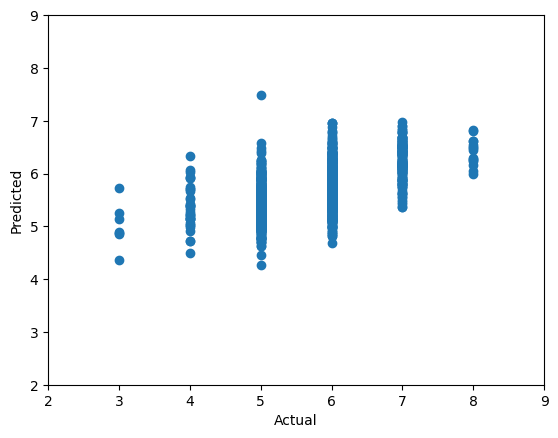

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlim(2,9)
plt.xlabel("Actual")
plt.ylim(2,9)
plt.ylabel("Predicted")

**Interpretation**: The x-axis represents the actual value and the y-axis represents the value that was predicted for quality of wine based on the sample information. If the model perfectly predicted the values, then this plot would have a perfect 45 degree slope running through it (y = x). Though the slope is not 45 degrees, the general trend is still positive and somewhat linear, meaning the job wasn't too bad.

We can see that the model never predicted correctly when the actual target value was 3, 4, and 8 (all of the predictions in these values lie outside the value).

However the model did better when predicting if the wine quality was 5, 6, or 7, as the predictions actually lay within the correct range.

**E)** Report the root-mean-square on the train and test sets.

In [ ]:
def RMS(y_pred, y_act):
  """
  Function that reports on the root-mean-square error for two vectors.

  input: predicted values, actual values (numpy arrays, 1d)
  returns: RMSE on the predicted vs actual values
  """
  if y_pred.shape != y_act.shape:
    return "Ensure predicted and actual values are equal in number. "
  if (len(y_pred.shape) != 1):
    return "Ensure both arrays are of shape (n_samples,) ."
  return np.sqrt(np.sum((y_act - y_pred) ** 2) / y_pred.shape[0])


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("RMS on train: ", RMS(y_train, y_pred_train))
print("RMS on test: ", RMS(y_test, y_pred_test))

RMS on train:  0.6536871700485255
RMS on test:  0.6171293739458968


**F)** Implement the least-mean-squares (LMS) algorithm for linear regression with random initialization of w(0) and stepsize(s) of your choice (you can experiment with that).

In [ ]:
# parameters to play around with
MAX_ITER = 1000 # number of iterations
STEP = 0.0001 # stepsize


y_mat = y_train

# add ones to X matrix for bias term
n = X_train.shape[0]
ones = np.ones((n,1))
X_mat = np.hstack([ones, X_train])

# initialize w randomly
amount = X_mat.shape[1]
w = [random.choice(range(-10, 10)) for _ in range(amount)]
w = np.array(w)
print("Initial w: \n", w)


# run LMS
n = 0
n_samples = X_mat.shape[0]
while n < (MAX_ITER):
  # shuffle the rows at every iteration
  # this way we are doing sampling with replacement
  indices = np.random.permutation(n_samples)

  for i in indices:
    y_n = y_mat[i]
    w_t = np.transpose(w)
    x_n = X_mat[i]
    w = w + STEP * (y_n - w_t @ x_n) * x_n
    i = i+1
  n += 1

np.set_printoptions(suppress=True)
print("Final w after LMS: \n", w)


Initial w: 
 [ -9   0   8   9   4  -7   6   7  -3   3  -4 -10]
Final w after LMS: 
 [ 5.66311101  0.05851112 -0.20554708 -0.04552549  0.01284029 -0.07077619
  0.03795817 -0.10532282 -0.03341695 -0.05363099  0.14378931  0.30880993]


**G)** Report the root-mean-square on the train and test sets.

In [ ]:
# predict using the train values

# add the ones and then multiply by w that's it

y_pred_train = X_mat @ w
n = X_test.shape[0]
ones = np.ones((n,1))
X_mat_test = np.hstack([ones, X_test])

y_pred_test = X_mat_test @ w

print("RMS on train: ", RMS(y_train, y_pred_train))
print("RMS on test: ", RMS(y_test, y_pred_test))

RMS on train:  0.6536912887970229
RMS on test:  0.6172236802807788
